# Using BERT with K-means

## Exploring to see if BERT with k-means will yield better clusters as opposed to just regular K-means with Tf-Idf from our other notebook.

In [465]:
# Connected to Bert-as-service server for sentence embeddings
from bert_serving.client import BertClient
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np


In [356]:
#loading cleaned tweets
df= pd.read_csv('cleaned_tweets.csv', index_col=False)
df.dropna(inplace=True)

In [357]:
df.reset_index(drop=True, inplace=True)

In [466]:
#looking at the cleaned column of tweets we are interested in
df.document

0                        full practic today miss game due
1                 pneumonia danger guy flu look job manag
2       ive lost pound less week due time ive get sick...
3                     actual whole way felt last time flu
4                      find famili need babi mom take med
                              ...                        
1941                               insulin also enjoy flu
1942    stream tonight go get sleep gotta get flu auto...
1943        flu kill white blood cell one job pleas start
1944             sit librari hour think healthi sorri man
1945                      took week flu put back bullshit
Name: document, Length: 1946, dtype: object

In [330]:
# transforming into a corpus for reading into Bert Client encoder
corpus=[]
a=[]
for i in range(len(df['document'])):
        a=df['document'][i]
        corpus.append(a)
        
corpus[0:15]

['full practic today miss game due',
 'pneumonia danger guy flu look job manag',
 'ive lost pound less week due time ive get sick symptom seem',
 'actual whole way felt last time flu',
 'find famili need babi mom take med',
 'havent singl flu shot vaccin kid import diseas',
 'feel like tweet normal get test mean gonna around',
 'stream tonight still super sick still pretti bad also arm hurt',
 'got fluvaccin know didnt detain ice despit free',
 'flu season folk wash gym',
 'back get last round vaccin bet get shot med',
 'could get paid catch flu',
 'shit gone today stomach flu like actual fuck',
 'flu season flu short market',
 'take one team part reason love guy fuck']

## Running our Bert_as_service to get embeddings

In [361]:
bc = BertClient(check_length=False)
vectors= bc.encode(['corpus'])

In [386]:
#X = vectors.reshape(vectors.shape[1:])
X= vectors.reshape(-1, 1)
y= df.label

X.shape

(768, 1)

In [ ]:
# tried splitting data but shapes of X and y and not the same
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
X = np.asarray([ 1994.,  1995.,  1996.,  1997.,  1998.,  1999.])
y = np.asarray([1.2, 2.3, 3.4, 4.5, 5.6, 6.7])

In [387]:
km = KMeans(20)
km.fit(X)
clusters = km.labels_.tolist()

In [364]:
cost=[]
for i in range(1,20):
    kmean= KMeans(i)
    kmean.fit(X)
    cost.append(kmean.inertia_)

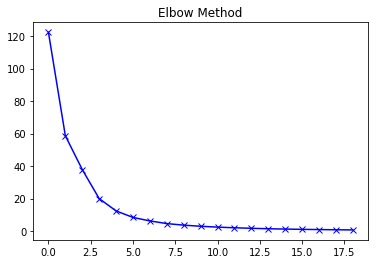

In [365]:
plt.plot(cost, 'bx-')
plt.title('Elbow Method')
plt.show()

## Choosing number of topics here based on our elbow plot

In [425]:
kmean= KMeans(5)
kmean.fit(X)
labels=kmean.labels_

In [426]:
clusters=pd.concat([df, pd.DataFrame({'cluster':labels})], axis=1)
clusters.head()

,Unnamed: 0,text,label,text_noURLs,text_punct,text_removeRT,tokenized,nonstop,Tweet_lemmatized,stemmed,remove_less_freq,remove_less_freq_lemma,document,document_lemma,document_stemmed,cluster
0,0,RT @HockeyinVegas: The @GoldenKnights' Marc-A...,0.0,RT : The ' Marc-Andre Fleury was a full parti...,RT The MarcAndre Fleury was a full particip...,The MarcAndre Fleury was full participant...,"['', 'the', 'marcandre', 'fleury', 'was', 'ful...","['', 'marcandre', 'fleury', 'full', 'participa...","['', 'marcandre', 'fleury', 'full', 'participa...","['', 'marcandr', 'fleuri', 'full', 'particip',...","['full', 'practic', 'today', 'miss', 'game', '...","['full', 'today', 'game', 'due']",full practic today miss game due,marcandre fleury full participant practice to...,marcandr fleuri full particip practic today m...,2.0
1,1,"Pneumonia is dangerous guys it’s not the flu ,...",0.0,"Pneumonia is dangerous guys it’s not the flu ,...",Pneumonia is dangerous guys it’s not the flu ...,Pneumonia dangerous guys ’ not the flu look ...,"['pneumonia', 'dangerous', 'guys', 'not', 'the...","['pneumonia', 'dangerous', 'guys', 'flu', 'loo...","['pneumonia', 'dangerous', 'guy', 'flu', 'look...","['pneumonia', 'danger', 'guy', 'flu', 'look', ...","['pneumonia', 'danger', 'guy', 'flu', 'look', ...","['pneumonia', 'guy', 'flu', 'look', 'job']",pneumonia danger guy flu look job manag,pneumonia dangerous guy flu look job manager r...,pneumonia danger guy flu look job manag replac...,2.0
2,2,I've lost 10 pounds in less than a week due to...,1.0,I've lost 10 pounds in less than a week due to...,Ive lost pounds in less than a week due to th...,Ive lost pounds less than week due the amo...,"['ive', 'lost', 'pounds', 'less', 'than', 'wee...","['ive', 'lost', 'pounds', 'less', 'week', 'due...","['ive', 'lost', 'pound', 'le', 'week', 'due', ...","['ive', 'lost', 'pound', 'less', 'week', 'due'...","['ive', 'lost', 'pound', 'less', 'week', 'due'...","['ive', 'lost', 'pound', 'week', 'due', 'time'...",ive lost pound less week due time ive get sick...,ive lost pound le week due amount time ive get...,ive lost pound less week due amount time ive g...,2.0
3,3,RT @greatestjubilee: there was actually a whol...,0.0,RT : there was actually a whole compilation of...,RT there was actually a whole compilation of ...,there was actually whole compilation ways ...,"['', 'there', 'was', 'actually', 'whole', 'com...","['', 'actually', 'whole', 'compilation', 'ways...","['', 'actually', 'whole', 'compilation', 'way'...","['', 'actual', 'whole', 'compil', 'way', 'felt...","['actual', 'whole', 'way', 'felt', 'last', 'ti...","['whole', 'way', 'felt', 'last', 'time', 'flu']",actual whole way felt last time flu,actually whole compilation way felt last time...,actual whole compil way felt last time flu,2.0
4,4,RT @hitchcockherd: You can find a family in ne...,0.0,RT : You can find a family in need (whether it...,RT You can find a family in need whether its ...,You can find family need whether its baby...,"['', 'you', 'can', 'find', 'family', 'need', '...","['', 'find', 'family', 'need', 'whether', 'bab...","['', 'find', 'family', 'need', 'whether', 'bab...","['', 'find', 'famili', 'need', 'whether', 'bab...","['find', 'famili', 'need', 'babi', 'mom', 'tak...","['find', 'need', 'mom', 'med']",find famili need babi mom take med,find family need whether baby adopted fostere...,find famili need whether babi adopt foster mo...,3.0


In [399]:
clusters.shape

(1946, 16)

## Interpreting our clusters

ValueError: color kwarg must have one color per data set. 274 data sets and 1 colors were provided

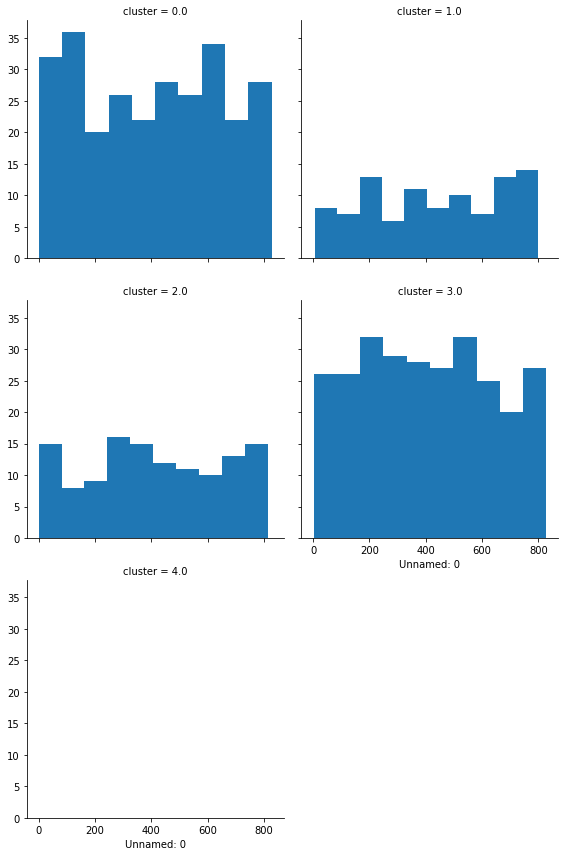

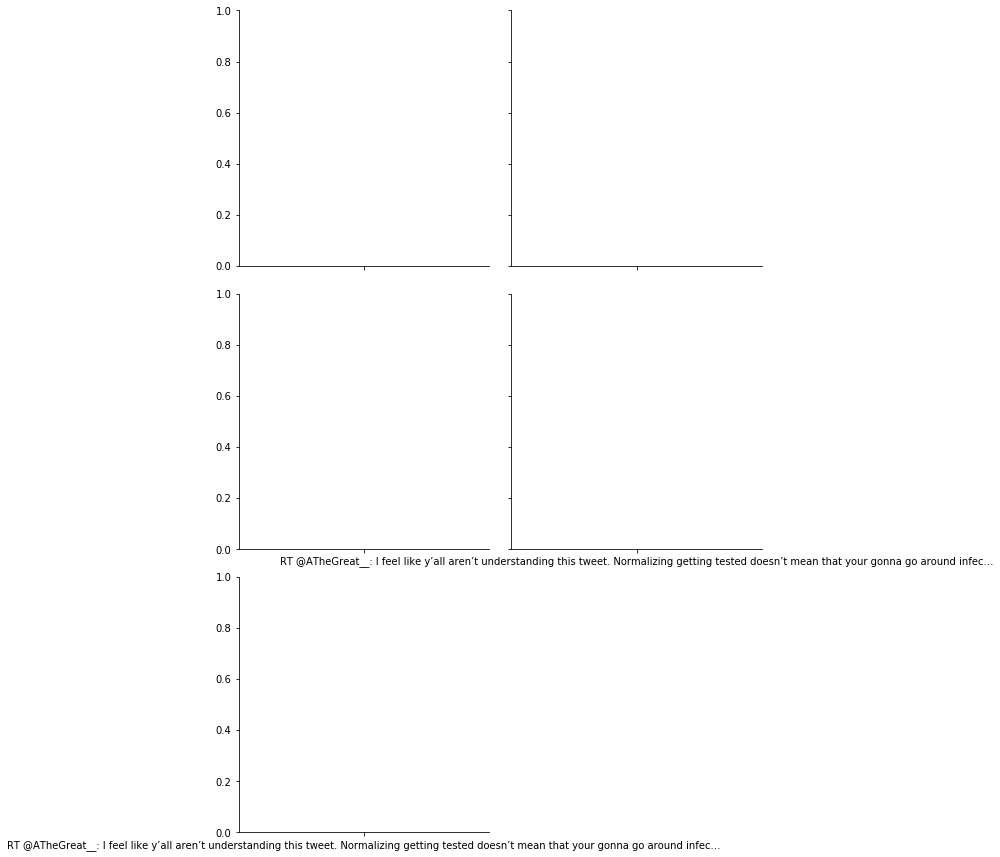

In [467]:
import seaborn as sns
import matplotlib.pyplot as plt
for c in clusters:
    grid= sns.FacetGrid(clusters, col='cluster', col_wrap=2, height=4)
    grid.map(plt.hist, c)

## Using PCA only for visualization

In [353]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
dist = 1 - cosine_similarity(X.reshape(-1,1))

pca = PCA(2)
pca.fit(dist)
X_PCA = pca.transform(dist)
X_PCA.shape

(768, 2)

In [ ]:
x, y = X_PCA[:, 0], X_PCA[:, 1]

colors = {0: 'red',
          1: 'blue',
          2: 'green', 
          3: 'yellow', 
          4: 'orange',  
          5:'purple'}

names = {0: '', 
         1: '', 
         2: '', 
         3: '', 
         4: '',
         5:''}
  
df = pd.DataFrame({'x': x, 'y':y, 'label':labels}) 
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(20, 13)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("")
plt.show()